![logo](../../../LogoLine_horizon_C3S.png)

<div class="alert alert-block alert-warning">
Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch
</div>

# Evaluation of Surface Albedo Variability and Radiation Response for Urban Heat Island Monitoring

&nbsp;

Production date: 30-09-2024

Produced by: University of Salerno - Department of Physics (Fabio Madonna and Faezeh Karimian Sarakhs)¶

## 🌍 Use case: Surface Albedo Variability and Its Implications for Urban Heat Island Intensity: A Case Study of Bangalore 
## ❓ Quality assessment question

**• How consistent are satellite-derived surface albedo estimates across time, and can they, when combined with outgoing radiation, be reliably applied to monitor urbanization-driven changes in the surface energy balance?**

Urban heat islands (UHIs) are metropolitan areas that are significantly warmer than their rural surroundings, largely due to reduced vegetation, thermal properties of building materials, anthropogenic heat release, and atmospheric pollution [1,2]. The most common and severe impacts of UHIs are on human health: during heat waves, increased urban temperatures can enhance the risk of heat stress, fainting, and even mortality. Despite these challenges, assessing and mitigating UHI impacts remain a priority for urban planning and public health policy.

In India, cities such as Delhi, Mumbai, and Bangalore have undergone rapid expansion in recent decades, intensifying UHI effects [3,4]. Bangalore is an interesting case study because of its rapid urban growth and emerging mitigation efforts, including the enhancement of greenery and the use of reflective surfaces [5], both of which directly influence surface albedo, a key parameter in regulating the surface energy balance [1,2]. Variations in surface albedo directly influence shortwave radiation fluxes and may be used to monitor the implementation of mitigation strategies [6].

Previous studies have demonstrated that urbanization is linked to declining albedo and increasing land surface temperatures [6], and that incorporating realistic albedo and vegetation data improves urban climate modeling [7]. Meanwhile, early foundational research established the energetic basis of UHIs [1] and identified the potential cooling benefits of high-albedo, reflective surfaces [2]. More recent multi-city analyses confirmed that UHI intensity is strongly influenced by surface albedo, vegetation fraction, and land cover [8,9].

In this context, the present analysis focuses on Bangalore, evaluating whether satellite-derived albedo datasets can reliably capture the effects of UHI mitigation strategies and associated radiative changes. By combining surface albedo with outgoing shortwave radiation (OSR) data, the study examines the extent to which these datasets can quantify the impact of vegetation enhancement, reflective surface adoption, and overall progress toward reducing UHI intensity.

## 📢 Quality assessment statement
```{admonition} These are the key outcomes of this assessment
:class: note

• By integrating SPOT and PROBA albedo products with ERA5-Land radiation data, it is possible to
evaluate the extent to which surface albedo variability shapes the urban energy balance in Bangalore.

• The spatial resolution of the CDS surface albedo 10-daily gridded dataset is adequate to track if the enhancement of greenery, as a mitigation technique for the Urban Heat Island (UHI) impacts, has indeed taken place in urban areas, according to spatial albedo maps (1999–2000 vs. 2012–2013). 

• Seasonal investigations show that albedo, which reflects vegetation dynamics and surface wetness, is lower in the pre-monsoon months and higher during the monsoon period. 

• Time series analysis reveals that variations in surface albedo exhibit a strong correspondence with shortwave radiation fluxes, as evidenced by a significant positive correlation (Pearson’s r ≈ 0.73). After accounting for long-term trends, the analysis indicates an OSR sensitivity of ~1916 W m⁻² per +1.0 albedo (≈19 W m⁻² per +0.01 albedo). Yet, the observed negative decadal albedo trend (–0.0036 per decade) implies an actual OSR decrease of about –6.7 W m⁻² per decade, showing that mitigation measures have not resulted in a net albedo increase at the decadal scale.

• Our results are consistent with previous findings showing that declining albedo enhances surface temperatures and UHI intensity. Earlier studies demonstrated that reflective surfaces and increased albedo mitigate urban energy absorption [2,6,7], while multi-city analyses confirmed the strong link between UHI intensity, albedo, vegetation, and land cover dynamics [9,10]. 

The results demonstrate that satellite-derived albedo datasets can be used as a proxy for monitoring
and quantifying urban heat island intensity in Bangalore, while also informing sustainable urban
design strategies such as reflective roofing, cool pavements, and urban greening.

## 📋 Methodology

The primary objective of this assessment is to compare time-weighted albedo maps derived from SPOT observations for two periods, 1999–2000 and 2012–2013, in order to evaluate spatial and temporal changes in surface reflectivity over Bangalore. This assessment also aims to evaluate the consistency and completeness of SPOT (1999–2013) and PROBA-V (2014–2020) satellite-derived datasets in capturing the monthly variability of surface albedo over Bangalore, a representative urban heat island city, for the period 1999–2020.

The methodology adopted for the analysis is split into the following steps:

[](satellite_satellite-albedo_consistency-assessment_q01:section-1)
* Import all required libraries  
* Spatial and temporal definitions for map plots
* Spatial and temporal definition for timesries plots

[](satellite_satellite-albedo_consistency-assessment_q01:section-2)
* Define required functions
* Download surface albedo data from SPOT VGT v2 (time period 1999–2014) and PROBA VGT v2 (time period 2014- 2021), both dataset with horizontal_resolution of 1 km
* Computation of time series
* Download ERA5-Land shortwave downward radiation 

[](satellite_satellite-albedo_consistency-assessment_q01:section-3)
* Time-Weighted SPOT Albedo Comparison for Southern India and Bangalore Between 1999–2000 and 2012–2013
* Seasonal SPOT-Derived Albedo in Bangalore (1999–2000 vs 2012–2013)
* Monthly Mean Albedo and Shortwave Radiation in Bangalore, India (1999–2020)
* Pearson Correlation of Albedo and Outgoing Shortwave Radiation (Bangalore, 1999–2020)
* Sensitivity of OSR to Surface Albedo Variations Over Bangalore: SPOT Era (2000–2013)

[](satellite_satellite-albedo_consistency-assessment_q01:section-4)

## 📈 Analysis and results
(satellite_satellite-albedo_consistency-assessment_q01:section-1)=
### 1. Dataset selection and set up the code

#### Import all required libraries
In this section, we import all the relevant packages needed for running the notebook. 

In [1]:
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import xarray as xr
from c3s_eqc_automatic_quality_control import diagnostics, download, plot, utils
import collections
import warnings
from scipy.stats import pearsonr
import pandas as pd
from scipy.stats import linregress

#### Spatial and temporal definitions for map plots

The analysis performed in this assessment focuses on data from July 1999 to June 2020, using monthly averages from the SPOT and PROBA. The study region is Bangalore, an urban heat island. The map plots show albedo for the two periods 1999–2000 and 2012–2013, while the time series plot presents albedo data for 1999–2020.

In [2]:
# South India Region
area = [15, 75, 10, 80]

# Bangalore Region
lon_slice = slice(77.4, 77.8)
lat_slice = slice(12.8, 13.2)

spot_periods = {
    "1999_2000": ["1999", "2000"],
    "2012_2013": ["2012", "2013"],
}

collection_id_albedo = "satellite-albedo"
albedo_request = {
    "format": "zip",
    "variable": "albb_bh",
    "sensor": "vgt",
    "product_version": "v2",
    "horizontal_resolution": "1km",
    "month": [f"{month:02d}" for month in range(1, 13)],
    "nominal_day": "10",
    "area": area,
}
albedo_kwargs = {
    "chunks": {"year": 1, "month": 1},
    "drop_variables": ["crs"],
}


collection_id_radiation = "satellite-earth-radiation-budget"
request_radiation = {
    "product_family": "clara_a3",
    "origin": "eumetsat",
    "variable": ["outgoing_shortwave_radiation"],
    "climate_data_record_type": "thematic_climate_data_record",
    "time_aggregation": "monthly_mean",
    "year": [str(year) for year in range(1999, 2021)],
    "month": [f"{month:02d}" for month in range(1, 13)],
    "area": [13.2, 77.4, 12.8, 77.8],  # Same area as Albedo
}

#### Spatial and temporal definition for time series plots

In [3]:
collection_id_albedo = "satellite-albedo"
chunks = {"year": 1}
common_request = {
    "variable": "albb_bh",
    "product_version": "v2",
    "month": [f"{month:02d}" for month in range(1, 13)],
    "nominal_day": "10",
}
requests = {
    "spot": {
        "year": [str(year) for year in range(1999, 2014)],
        "horizontal_resolution": "1km",
        "sensor": "vgt",
    },
    "proba": {
        "year": [str(year) for year in range(2014, 2021)],
        "horizontal_resolution": "1km",
        "sensor": "vgt",
    },
}
areas = {"region1": [13.2, 77.4, 12.8, 77.8]}  # Bounding box for region1

(satellite_satellite-albedo_consistency-assessment_q01:section-2)=
### 2. Data Retrieval and Preparation

In this step, the selected satellite data is downloaded using predefined time and variable settings. 

#### Define required functions

The following functions were defined to support the analysis of albedo data:

In [4]:

def regionalised_func(ds, lon_slice, lat_slice, func):
    ds = utils.regionalise(ds, lon_slice=lon_slice, lat_slice=lat_slice)
    return func(ds)


def plot_maps(da, lon_slice=None, lat_slice=None, area=area, title="", **kwargs):
    if lon_slice is None:
        lon_slice = slice(*sorted([area[1], area[3]]))
    if lat_slice is None:
        lat_slice = slice(*sorted([area[0], area[2]]))

    kwargs.setdefault("row", "period" if "period" in da.dims else None)
    kwargs.setdefault("col", "season" if "season" in da.dims else None)
    da["longitude"] = da["longitude"].astype("float32")
    da["latitude"] = da["latitude"].astype("float32")
    da = utils.regionalise(da, lon_slice=lon_slice, lat_slice=lat_slice)

    facet = plot.projected_map(da, **kwargs)
    for ax in facet.axs.flatten():
        ax.set_extent(
            [lon_slice.start, lon_slice.stop, lat_slice.start, lat_slice.stop]
        )

    return facet    

#### Download surface albedo data from SPOT VGT v2 (time period 1999–2014) and PROBA VGT v2 (time period 2014- 2021), both dataset with horizontal resolution of 1 km.

In [5]:

datasets = []
for label, years in spot_periods.items():
    ds = download.download_and_transform(
        collection_id_albedo,
        albedo_request | {"satellite": "spot", "year": years},
        transform_func=diagnostics.time_weighted_mean,
        transform_chunks=False,
        **albedo_kwargs,
    )
    datasets.append(ds.expand_dims(period=[label]))
ds_albedo_maps = xr.concat(datasets, "period")


albedo_timeseries_zoom = {}
for label, years in spot_periods.items():
    albedo_timeseries_zoom[label] = download.download_and_transform(
        collection_id_albedo,
        albedo_request | {"satellite": "spot", "year": years},
        transform_func=regionalised_func,
        transform_func_kwargs={
            "lon_slice": lon_slice,
            "lat_slice": lat_slice,
            "func": diagnostics.spatial_weighted_mean,
        },
        **albedo_kwargs,
    )



    # Seasonal mean
datasets = []
for label, years in spot_periods.items():
    ds = download.download_and_transform(
        collection_id_albedo,
        albedo_request | {"satellite": "spot", "year": years},
        transform_func=diagnostics.seasonal_weighted_mean,
        transform_chunks=False,
        **albedo_kwargs,
    )
    datasets.append(ds.expand_dims(period=[label]))
ds_albedo_season_maps = xr.concat(datasets, "period")



datasets1 = collections.defaultdict(list)

for region, area in areas.items():
    for satellite, request in requests.items():
        ds1 = download.download_and_transform(
            collection_id_albedo,
            common_request | request | {"satellite": satellite, "area": area},
            # force returning an xarray object
            transform_func=lambda ds: ds,      # identity transform
            chunks=chunks,
            drop_variables=["crs"],
        )
        datasets1[region].append(ds1.expand_dims(region=[region], satellite=[satellite]))

100%|██████████| 7/7 [00:00<00:00, 19.96it/s]


#### Computation of time series

In [6]:
ds_region1 = xr.concat(datasets1["region1"], dim="satellite", join="outer")
ds_time_series_albedo = ds_region1["AL_BH_BB"].mean(dim=["latitude", "longitude"], skipna=True)

#### Download & Process Radiation Data

In [7]:
ds_radiation = download.download_and_transform(collection_id_radiation, request_radiation, split_all=True)

100%|██████████| 264/264 [00:06<00:00, 38.22it/s]
                                     

In [8]:
ds_radiation = download.download_and_transform(collection_id_radiation, request_radiation, split_all=True)


ShortWave_radiation = ds_radiation["SW_flux"].mean(dim=["latitude", "longitude"]) 

100%|██████████| 264/264 [00:10<00:00, 25.90it/s]
                                     

(satellite_satellite-albedo_consistency-assessment_q01:section-3)=
### 3.  Plot and describe the results

#### Time-Weighted SPOT Albedo Comparison for Southern India and Bangalore Between 1999–2000 and 2012–2013

To examine spatial variations in surface reflectivity, time-weighted broadband hemispherical albedo maps were generated for Bangalore using SPOT data for two representative periods: 1999–2000 and 2012–2013. These maps allow for a direct comparison of albedo patterns across more than a decade of urban growth. The spatial maps of albedo in the city of Bangalore for the years 1999–2000 and 2012–2013 reveal that the spatial resolution of the CDS surface albedo 10-daily gridded dataset is sufficient to quantify and monitor the effect of greenery and other mitigation strategies on UHI.

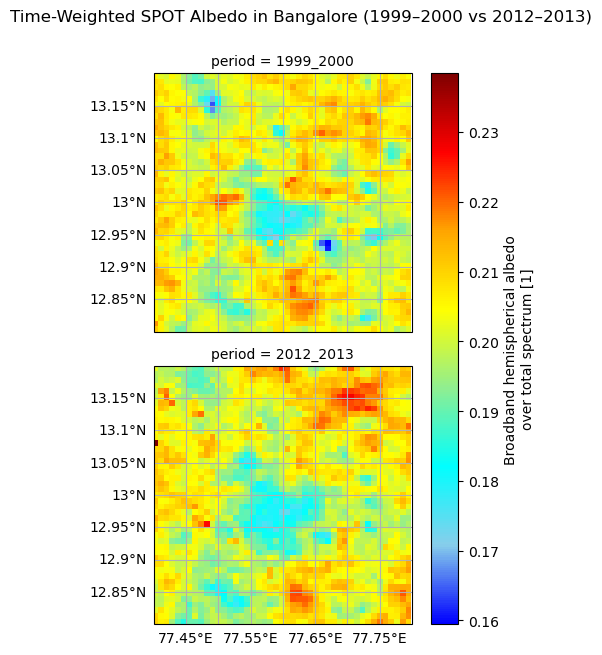

In [9]:
custom_cmap_s = mcolors.LinearSegmentedColormap.from_list(
    "CustomColorMap",
    ["blue", "skyblue", "cyan", "lightgreen", "yellow", "orange", "red", "maroon"],
)
facet_albedo_zoom = plot_maps(
    ds_albedo_maps["AL_BH_BB"],
    lon_slice=lon_slice,
    lat_slice=lat_slice,
    cmap=custom_cmap_s
)

plt.suptitle("Time-Weighted SPOT Albedo in Bangalore (1999–2000 vs 2012–2013)", fontsize=12, y=1.05)
plt.show()

*Figure 1.* Time-weighted broadband hemispherical albedo maps derived from SPOT for two periods: 1999–2000 and 2012–2013 over Bangalore.

#### Seasonal SPOT-Derived Albedo in Bangalore (1999–2000 vs 2012–2013)

To better understand how surface reflectivity varies throughout the year, seasonal albedo maps were generated for Bangalore using SPOT observations for the periods 1999–2000 and 2012–2013. The results are organized according to the standard climatological seasons: DJF (winter), MAM (pre-monsoon), JJA (monsoon), and SON (post-monsoon). The seasonal albedo maps for 1999–2000 and 2012–2013 reveal lower albedo values in the city center compared to the surrounding areas. This low-albedo feature aligns with Bellandur Lake, as confirmed by remote sensing analysis of urban lakes in Bangalore [10]. This finding aligns with the research by Kanga et al. (2022) [3], Ramachandra and Aithal (2019) [4], and TERI (2017) [5], which report the city center is dominated by built-up areas interspersed with some green spaces, while the outskirts are predominantly agricultural land (vegetation) with some open fields and infrastructural development areas. Moreover, over the two time periods, an increase in the area with lower albedo values is observed in the city center. 

Text(0.5, 1.05, 'Seasonal Albedo Maps for Bangalore: SPOT (1999–2000 vs 2012–2013)')

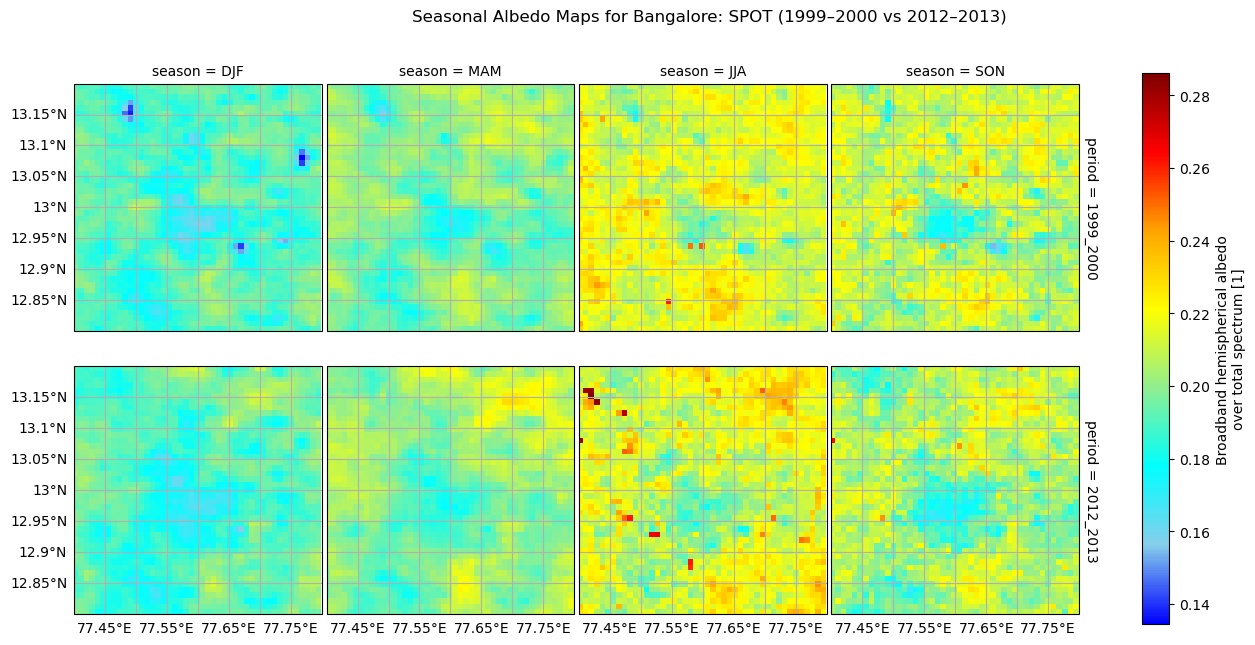

In [10]:
desired_order = ["DJF", "MAM", "JJA", "SON"]
reordered_data_albedo = ds_albedo_season_maps["AL_BH_BB"].sel(season=desired_order)

facet_albedo_zoom = plot_maps(
    reordered_data_albedo,
    lon_slice=lon_slice,
    lat_slice=lat_slice,
    cmap=custom_cmap_s
)
facet_albedo_zoom.fig.suptitle(
    "Seasonal Albedo Maps for Bangalore: SPOT (1999–2000 vs 2012–2013)",
    fontsize=12,
    y=1.05
)

*Figure 2.* Seasonal broadband hemispherical albedo maps for Bangalore derived from SPOT observations for two periods (1999–2000, top row; 2012–2013, bottom row). Panels show the climatological seasons: DJF (winter), MAM (pre-monsoon), JJA (monsoon), and SON (post-monsoon).

#### Monthly Mean Albedo and Shortwave Radiation in Bangalore, India (1999–2020)

The reported time series illustrates the co-variation of monthly mean albedo (blue) derived from SPOT and PROBA satellites and outgoing shortwave radiation (red) from ERA5-Land for the period 1999–2020. Both variables exhibit a strong seasonal cycle, with peaks during the pre-monsoon and monsoon months and declines during winter, reflecting the influence of vegetation growth, soil moisture, and surface exposure on reflectivity and radiative fluxes.

The close alignment between the albedo and shortwave radiation curves highlights a positive correlation between the two variables: months with higher surface reflectivity generally coincide with greater outgoing shortwave radiation. This relationship supports the robustness of satellite-derived albedo as a proxy for monitoring changes in the urban surface energy balance.

Over the two decades, subtle shifts in the baseline albedo can be observed, particularly a slight decline during the later years, which is consistent with urban expansion in Bangalore, leading to increased impervious surfaces and reduced vegetative cover. At the same time, the seasonal variability remains well preserved, suggesting that while the urban footprint influences mean values, the regional monsoon-driven radiation cycle continues to dominate.

Together, these results confirm that satellite-derived albedo combined with reanalysis radiation data provides a reliable approach for assessing long-term urban climate dynamics, including the intensity of the urban heat island effect and the effectiveness of mitigation strategies such as greening and reflective surfaces.

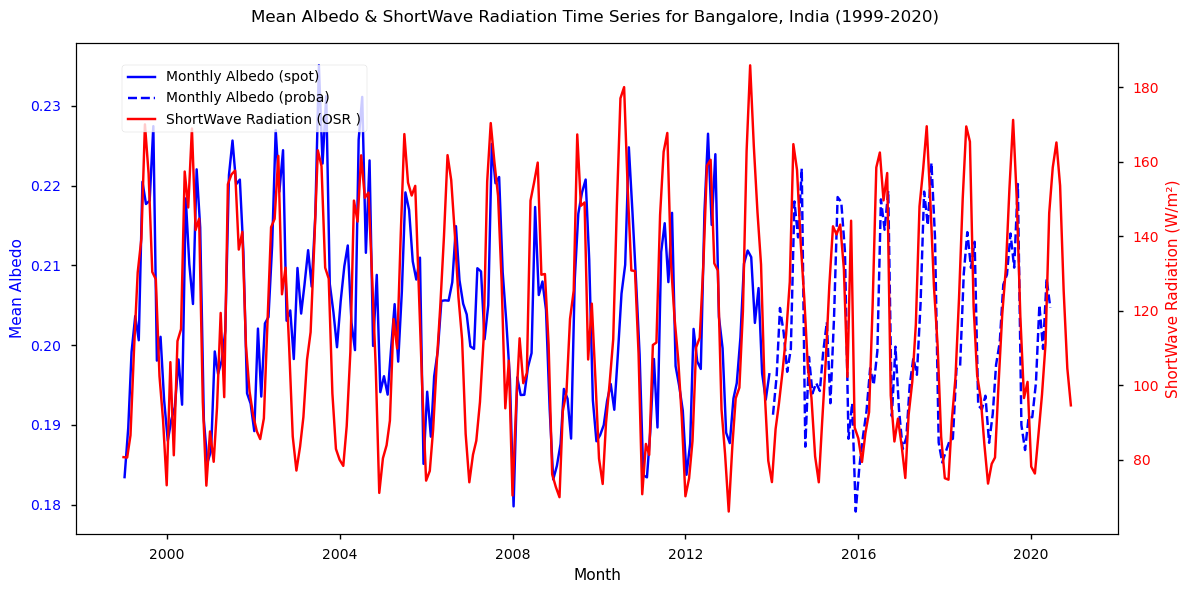

In [11]:
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-notebook")
time_albedo = ds_time_series_albedo.time.values
time_radiation = ds_radiation["time"].values

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel("Month")
ax1.set_ylabel("Mean Albedo", color="blue")

for satellite in ds_time_series_albedo.satellite.values:
    if satellite == "spot":
        ax1.plot(
            time_albedo,
            ds_time_series_albedo.sel(satellite=satellite).squeeze(),
            label=f"Monthly Albedo ({satellite})",
            color="blue",
            linestyle="-"  # Solid line for 'spot'
            
        )
    else:
        ax1.plot(
            time_albedo,
            ds_time_series_albedo.sel(satellite=satellite).squeeze(),
            label=f"Monthly Albedo ({satellite})",
            color="blue",
            linestyle="--"  # Dashed line for other satellites
          
        )


    
ax1.tick_params(axis="y", labelcolor="blue")
ax2 = ax1.twinx()
ax2.set_ylabel("ShortWave Radiation (W/m²)", color="red")
ax2.plot(time_radiation, ShortWave_radiation, label="ShortWave Radiation (OSR )", color="red")
ax2.tick_params(axis="y", labelcolor="red")
fig.suptitle("Mean Albedo & ShortWave Radiation Time Series for Bangalore, India (1999-2020)")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
fig.tight_layout()
plt.savefig("albedo_ShortWaveradiation_Monthlyplot.png", dpi=300, bbox_inches="tight")
plt.show()            

*Figure 3.* Monthly time series of mean surface albedo (blue) from SPOT (solid) and PROBA (dashed) satellites, compared with outgoing shortwave radiation (red, ERA5-Land) over Bangalore, India, for 1999–2020.

#### Pearson Correlation of Albedo and Outgoing Shortwave Radiation (Bangalore, 1999–2020)

To statistically evaluate the relationship between monthly mean albedo and outgoing shortwave radiation (OSR) in Bangalore, a Pearson correlation analysis was conducted for the period 1999–2020. The results show a strong positive correlation (r = 0.74) with a highly significant p-value (<<0.001), indicating that the observed relationship is not due to random variation.

This means that higher albedo values are consistently associated with greater OSR, reflecting the physical process by which more reflective surfaces return a larger fraction of incoming solar radiation back to the atmosphere. However, OSR is also modulated by additional factors, including surface roughness, aerosol loading,
cloud cover, and atmospheric water vapor, which may explain the residual varaiblity of the OSR. In the context of Bangalore’s urban growth, this statistical finding highlights that land cover changes, such as conversion of vegetation to impervious built-up surfaces, have a measurable impact on the city’s surface energy balance and potentially on urban heat island dynamics.

In [12]:
albedo_all = ds_time_series_albedo.mean(dim="satellite").squeeze()
albedo_series = pd.Series(albedo_all.values, index=albedo_all.time.values)

osr_series = pd.Series(
    ShortWave_radiation.sel(time=albedo_all.time, method="nearest").values,
    index=albedo_all.time.values
)

from scipy.stats import pearsonr
correlation, p_value = pearsonr(albedo_series, osr_series)

print(f"Monthly Pearson Correlation (Albedo vs OSR): {correlation:.3f}")
print(f"P-value: {p_value:.3e}")

Monthly Pearson Correlation (Albedo vs OSR): 0.740
P-value: 4.933e-46


#### Decadal Trend of Surface Albedo and Its Implications for OSR in Bangalore (2000–2013)

To assess the long-term relationship between surface reflectivity and outgoing shortwave radiation (OSR), we analyzed albedo trends over Bangalore using SPOT observations for 2000–2013. The results show a statistically significant negative albedo trend of –0.00033 per year (≈ –0.0036 per decade, p < 0.01, Mann–Kendall test). When combined with the regression slope between OSR and albedo (~1916 W m⁻² per +1.0 albedo), this trend corresponds to an estimated OSR decrease of about –6.7 W m⁻² per decade.

This finding highlights that relatively small but persistent reductions in albedo, driven by vegetation loss, surface darkening, or urban expansion, can systematically lower reflected solar energy and increase net radiative forcing at the surface. In practical terms, this means that despite the theoretical potential of reflective surfaces (e.g., cool roofs, light-colored pavements, or urban greening) to enhance albedo, mitigation measures in Bangalore have not produced a measurable positive trend at the decadal scale.

In [21]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

df_m = pd.DataFrame({"albedo": albedo_series, "OSR": osr_series}).dropna().sort_index()

# 1) OSR–albedo sensitivity (monthly data)
res_alb_osr = linregress(df_m["albedo"].values, df_m["OSR"].values)
slope_alb_osr = res_alb_osr.slope                    # W m^-2 per +1.0 albedo
se_slope_alb_osr = res_alb_osr.stderr
ci95_slope_alb_osr = 1.96 * se_slope_alb_osr
slope_per001 = slope_alb_osr * 0.01                  # per +0.01 albedo
ci95_per001   = ci95_slope_alb_osr * 0.01

# 2) Albedo trend per decade
albedo_annual = df_m["albedo"].resample("Y").mean()
years = albedo_annual.index.year

res_trend = linregress(years, albedo_annual.values)
trend_per_year = res_trend.slope
se_trend_per_year = res_trend.stderr
ci95_trend_per_year = 1.96 * se_trend_per_year

trend_per_decade = trend_per_year * 10.0
ci95_trend_per_decade = ci95_trend_per_year * 10.0

# 3) Mann–Kendall
mk_result = None
try:
    import pymannkendall as mk
    mk_result = mk.original_test(albedo_annual.values)
    mk_trend = mk_result.trend
    mk_p = float(mk_result.p)
    mk_sen_slope_per_year = float(mk_result.slope)
    mk_sen_slope_per_decade = mk_sen_slope_per_year * 10.0
except Exception as _:
    # Minimal fallback: report not available
    mk_trend = "not computed (pymannkendall missing)"
    mk_p = np.nan
    mk_sen_slope_per_year = np.nan
    mk_sen_slope_per_decade = np.nan

# 4) Convert albedo trend into OSR change per decade (with uncertainty propagation)
#    OSR_decade = slope * trend_decade
osr_change_decade = slope_alb_osr * trend_per_decade
se_osr_change_decade = np.sqrt((trend_per_decade * se_slope_alb_osr)**2 +
                               (slope_alb_osr * ci95_trend_per_decade/1.96)**2)
ci95_osr_change_decade = 1.96 * se_osr_change_decade

# 5) Print concise summary for the QA bullet
print("=== Relationship & Trend Summary (Bangalore; SPOT 2000–2013) ===")
print(f"OSR–albedo slope: {slope_alb_osr:,.2f} W m^-2 per +1.0 albedo "
      f"(95% CI ±{ci95_slope_alb_osr:,.2f})  "
      f"[≈ {slope_per001:.2f} ± {ci95_per001:.2f} W m^-2 per +0.01 albedo]")
print(f"Albedo trend:      {trend_per_decade:.6f} per decade (95% CI ±{ci95_trend_per_decade:.6f}) "
      f"[per year = {trend_per_year:.6f} ± {ci95_trend_per_year:.6f}]")
print(f"Mann–Kendall:      trend = {mk_trend}, p = {mk_p:.3g}, "
      f"Sen's slope ≈ {mk_sen_slope_per_decade if np.isfinite(mk_sen_slope_per_decade) else np.nan:.6f} per decade")
print(f"OSR change/decade: {osr_change_decade:,.2f} W m^-2 (95% CI ±{ci95_osr_change_decade:,.2f})")


=== Relationship & Trend Summary (Bangalore; SPOT 2000–2013) ===
OSR–albedo slope: 1,915.72 W m^-2 per +1.0 albedo (95% CI ±213.16)  [≈ 19.16 ± 2.13 W m^-2 per +0.01 albedo]
Albedo trend:      -0.003628 per decade (95% CI ±0.002202) [per year = -0.000363 ± 0.000220]
Mann–Kendall:      trend = decreasing, p = 0.00803, Sen's slope ≈ -0.003341 per decade
OSR change/decade: -6.95 W m^-2 (95% CI ±4.29)


#### Scatter Plot of OSR vs. Albedo, Colored by Incoming SW Radiation

The scatter plot illustrates the relationship between surface albedo and outgoing shortwave radiation (OSR) for Bangalore during 2000–2013. Each point corresponds to a monthly observation, while the color shading indicates the magnitude of the incoming shortwave flux (SW_down). As expected, OSR increases with albedo, but the spread of points across different SW_down values shows that the relationship is also strongly modulated by the incoming radiation. This highlights that OSR is not solely controlled by albedo, but rather by the combination of albedo and available incoming solar energy, consistent with the theoretical relation OSR ≈ albedo × SW_down.

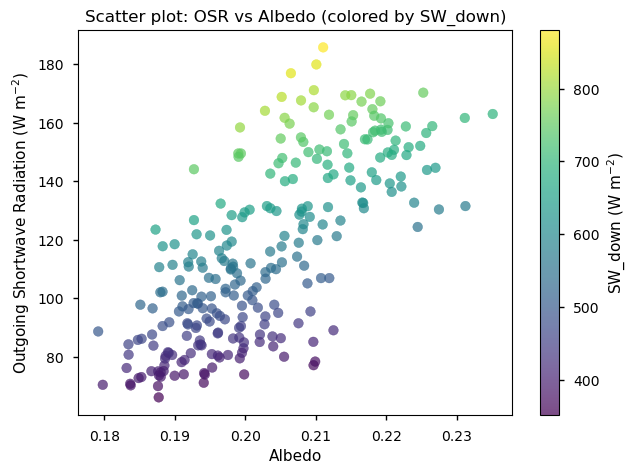

In [23]:
import matplotlib.pyplot as plt
df = pd.concat([albedo_series, osr_series], axis=1).dropna()
df.columns = ["albedo", "OSR"]

# Compute incoming shortwave (SW_down) = OSR / albedo
df["SW_down"] = df["OSR"] / df["albedo"]

# Scatter plot OSR vs albedo 
plt.figure(figsize=(7, 5))
plt.scatter(df["albedo"], df["OSR"], c=df["SW_down"], cmap="viridis", alpha=0.7)
plt.colorbar(label="SW_down (W m$^{-2}$)")
plt.xlabel("Albedo")
plt.ylabel("Outgoing Shortwave Radiation (W m$^{-2}$)")
plt.title("Scatter plot: OSR vs Albedo (colored by SW_down)")
plt.show()

*Figure 4.* Relationship between surface albedo and outgoing shortwave radiation (OSR). Each point shows OSR (W m⁻²) versus albedo; color indicates incoming shortwave (SW_down, W m⁻²).

(satellite_satellite-albedo_consistency-assessment_q01:section-4)=
### 4. Take-Home Messages

Urban albedo matters: Satellite-derived albedo from SPOT and PROBA, combined with ERA5-Land radiation data, proved reliable for assessing long-term changes in Bangalore’s surface energy balance.

- Urbanization impact: The spatial resolution of the CDS surface albedo 10-daily gridded dataset is
sufficient to monitor if the enhancement of greenery, as a mitigation strategy for the Urban Heat Island
(UHI) effects, has actually occurred in urban areas.
- Seasonal analyses reveal lower albedo during pre-monsoon months and higher values in monsoon
period, reflecting vegetation dynamics and surface wetness.
- Long-term analysis reveals a statistically significant negative albedo trend of –0.00033 per year (≈ –0.0036 per decade, p < 0.01, Mann–Kendall test). When combined with the regression slope between OSR and albedo (~1916 W m⁻² per +1.0 albedo), this trend translates into an estimated OSR decrease of ~–6.7 W m⁻² per decade. This indicates that, in practice, mitigation measures in Bangalore have not produced a measurable long-term increase in albedo, despite the theoretical potential of reflective urban design to influence shortwave radiative forcing.
- Results align with previous studies [6,7], reinforcing the role of albedo in regulating urban climate and
its potential in UHI mitigation strategies.

## ℹ️ If you want to know more
### Key Resources

• Surface albedo 10-daily gridded data from 1981 to present

https://cds.climate.copernicus.eu/datasets?q=albedo&limit=30

Code libraries used:

• C3S EQC custom function, c3s_eqc_automatic_quality_control, prepared by B-Open

### References

1. Oke, T. R. (1982). The energetic basis of the urban heat island. Quarterly Journal of the Royal Meteorological Society, 108(455), 1–24.

2. Taha, H. (1997). Urban climates and heat islands: albedo, evapotranspiration, and anthropogenic heat. Energy and Buildings, 25(2), 99–103.

3. Kanga, S., Meraj, G., Johnson, B. A., Singh, S. K., PV, M. N., Farooq, M., ... & Sahu, N. (2022). Understanding the Linkage between Urban Growth and Land Surface Temperature — A Case Study of Bangalore City, India. Remote Sensing, 14(17), 4241.

4. Ramachandra, T. V., & Aithal, B. H. (2019). Bangalore. The Wiley Blackwell Encyclopedia of Urban and Regional Studies, 1-21.

5. TERI (The Eneregy and Resources Institute) (2017). Urban Planning Characteristics to Mitigate Climate Change in context of Urban Heat island Effect prepared for Environmental Management & Policy Research Institute (EMPRI.)

6. Trlica, A., Hutyra, L. R., Schaaf, C. L., Erb, A., & Wang, J. A. (2017). Albedo, Land Cover, and Daytime Surface Temperature Variation Across an Urbanized Landscape. Remote Sensing of Environment, 190, 153–163.

7. Vahmani, P., & Ban-Weiss, G. A. (2016). Impact of remotely sensed albedo and vegetation fraction on simulation of urban climate in WRF-urban canopy model: A case study of the urban heat island in Los Angeles. JGR: Atmospheres, 121(4), 1511–1531.

8. Li, D., Bou-Zeid, E., & Oppenheimer, M. (2014). The effectiveness of cool and green roofs as urban heat island mitigation strategies. Environmental Research Letters, 9(5), 055002.

9. Peng, S., Piao, S., Ciais, P., Friedlingstein, P., Ottle, C., Bréon, F. M., … & Myneni, R. B. (2012). Surface urban heat island across 419 global big cities. Environmental Science & Technology, 46(2), 696–703.

10. Bareuther, M., Klinge, M. and Buerkert, A., 2020. Spatio-temporal dynamics of algae and macrophyte cover in urban lakes: A remote sensing analysis of Bellandur and Varthur Wetlands in Bengaluru, India. Remote Sensing, 12(22), p.3843.